# <font style="color:green">Introduction</font>

Welcome to this comprehensive guide on handling video data using OpenCV in Python. OpenCV, short for Open Source Computer Vision Library, is a powerhouse library of programming functions mainly aimed at real-time computer vision. This notebook is crafted to introduce you to the fundamental techniques for reading video files, capturing video from cameras, processing video frames, and writing these frames back to a new video file. Whether you're starting your journey in video processing or aiming to refine your existing skills, this notebook is poised to provide you with valuable insights into managing video data with proficiency.

Our exploration will dive directly into how to read videos from files, capture live video from your computer's camera, guiding you through each step to process video frames effectively, and concluding with how to write these processed frames back to a new video file. Along the way, we will cover essential processing techniques, including but not limited to frame conversion and resizing.

By the end of this notebook, you'll have a solid understanding of working with video data in OpenCV, equipped with the knowledge to apply these techniques in your projects. Whether your interest lies in video editing, computer vision applications, or simply learning how to manipulate video data, this guide will serve as your stepping stone into the world of video processing with OpenCV. Let's dive in and start exploring the powerful capabilities of OpenCV for video processing!

In [1]:
import os
import io
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
from base64 import b64encode
from PIL import Image

%matplotlib inline

# 1. Reading a Video File


Reading videos is the first critical step in video processing with OpenCV. This section will introduce you to the essential function `cv2.VideoCapture()`, a versatile method used to capture video from video files or directly from a camera.


In [3]:
video_path = 'VID-20221204-WA0044.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file!")

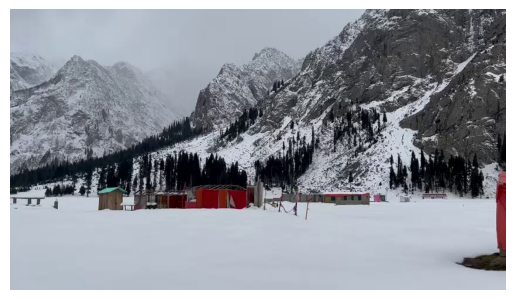

In [4]:
# Capture the first frame
ret, frame = cap.read()

# Check if frame is captured successfully
if ret:
    plt.imshow(frame[..., ::-1])
    plt.axis('off')
    plt.show()
else:
    print("Failed to capture the first frame!")

# Release the VideoCapture object
cap.release()

# 2. Processing Video Frames

Once you've read video frames, the next step is to process them. This can involve various operations such as converting to grayscale, resizing, or applying filters, depending on your objectives. Here's a quick look at some common frame processing techniques:

### Converting to Grayscale 

This simplifies the frame to a single channel, making it easier for further processing or analysis.

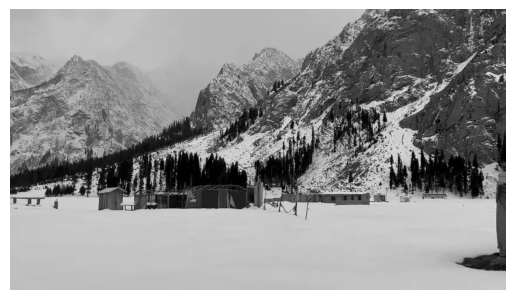

In [5]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_frame, cmap='gray')
plt.axis('off')
plt.show()

### Resizing 

This changes the frame dimensions, which can be useful for reducing computation or fitting specific display requirements.

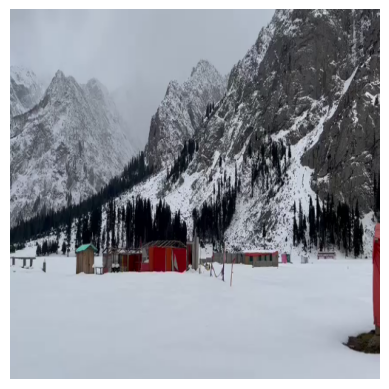

In [6]:
new_width = 500
new_height = 500

# Resize the frame
resized_frame = cv2.resize(frame, (new_width, new_height))

# Convert color space from BGR to RGB
resized_frame_rgb = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

plt.imshow(resized_frame_rgb)
plt.axis('off')
plt.show()

### Applying Filters 

This is like blurring or edge detection enhances or reduces features within frames.

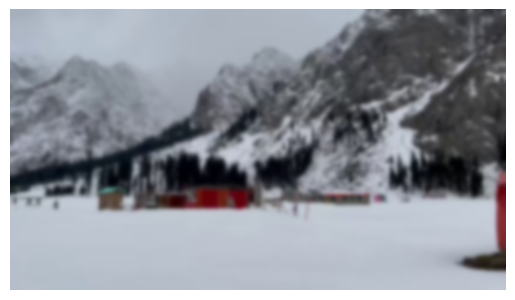

In [7]:
# Apply Gaussian blur to the frame
blurred_frame = cv2.GaussianBlur(frame, (21, 21), 0)

blurred_frame_rgb = cv2.cvtColor(blurred_frame, cv2.COLOR_BGR2RGB)

plt.imshow(blurred_frame_rgb)
plt.axis('off')
plt.show()

# 3. Writing the Video

After processing video frames, you might want to save the results into a new video file. OpenCV provides a straightforward way to accomplish this through the `cv2.VideoWriter` class. Here’s a quick guide on how to write processed frames back to a video:

In [8]:
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file!")
    exit()
    
# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Initialize VideoWriter
out = cv2.VideoWriter('blurred_video.mp4', cv2.VideoWriter_fourcc(*'avc1'), fps, (frame_width, frame_height))

# Read and process frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Apply Gaussian blur to the frame
    blurred_frame = cv2.GaussianBlur(frame, (21, 21), 0)
    
    # Write the blurred frame to the output video
    out.write(blurred_frame)

# Release resources
cap.release()
out.release()

# 4. Capturing and Saving Video from a Camera


This section delves into the process of using OpenCV to capture live video streams directly from a camera. This feature is essential for numerous applications such as real-time surveillance, interactive systems, and any computer vision project requiring live video input.

To capture video from a camera, we use the `cv2.VideoCapture()` function. This function is designed to initialize video capture from video files and cameras. For capturing live video from a camera, an integer identifier is passed to `cv2.VideoCapture()`. This identifier selects the camera:

- `0` for the default camera
- `1`, `2`, etc., for other cameras if multiple are connected


The `cv2.VideoWriter` object in OpenCV is used for writing videos. This means you can save image sequences or streams as video files in various formats like `.mp4`, `.avi`, etc. It's particularly useful in video processing tasks, applications that require video output like surveillance, video content generation, and more.

**Key Parameters of cv2.VideoWriter**

- **`filename`**: A string representing the name of the output video file. Example: 'output.avi'.

- **`fourcc`**: A 4-byte code that is used to specify the video codec. The code can be obtained using `cv2.VideoWriter_fourcc('M','J','P','G')` for MJPG codec or similar methods for other codecs. It defines the video compression format.

- **`fps`**: The frame rate of the video. It's a floating-point number defining how many frames per second the video should have.

- **`frameSize`**: The size of the video frames. It's given as a tuple (width, height), defining the spatial dimensions of the video.


In [10]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Can't receive frame (stream end?). Exiting ...")
        break

    flipped_frame = cv2.flip(frame, 1)

    out.write(flipped_frame)

    cv2.imshow('frame', flipped_frame)
    
    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

# <font style="color:green">Conclusion</font>


In conclusion, this guide has journeyed through the essential aspects of handling video data using OpenCV in Python. From reading video files and capturing live footage from cameras to the intricate processing of video frames and saving them into new files, we've covered a broad spectrum of operations that are foundational to video processing. The skills and insights gained here are crucial stepping stones for further exploration and innovation in the field of computer vision.